# Project 1 : Using PostgreSQL + Pandas for Data Management & Analysis

#### Author: Ruixin Chen, Hang Yu

## Topic: 
* Using the data of the sales information of Taylor Swift albums in different music sales platform in China, analyze the best allocation of sales of the concert tickets to Taylor Swift concert in China. 
* Because in this concert Taylor will sing 35 songs from her album, so she need to know the priority order of choosing songs of the concert from different albums. Using the total sales volume and Douban score of each album, get that and give a weight.

## Background:
  * As Taylor Swift became the most popular forign singer for Chinese young people, she has hold the her concert in China mainland for the first time last year, and the tickets was sold out in under a minute. So, for giving back to the sales platforms which bought the copyright of her albums. The concert in China this year will increase the tickets to one hundred thousand, and people can buy them in those sales platforms. 
  * Usually the high-sales platform can afford larger visitors buy tickets at the same time, that will help music fans to buy tickets smoothly.

## The goal:
### Find out the best allocation of sales of the concert tickets
###  And find out the best allocation of songs from different albums in the concert

## Methods:
  * Find the data source of the sales information of Taylor Swift albums in different music sales platform in China and get it.
  * Create a fully normalized SQL database schema for the data
  * Create an ER diagram for your proposed schema.
  * Formulate SQL statements that will create your proposed database and tables within PostgreSQL, including any required primary and foreign keys.
  * Open the PostgreSQLpsql terminal and execute the SQL statements which have written to create your proposed database within the PostgreSQL.
  * Connect to the PostgreSQL server from within the Jupyter Notebook environment,and then load the data set into the new PostgreSQL database.
  * read the dataset from this new PostgreSQL database into a new Pandas dataframe within Jupyter Notebook.
  * Using the newly created dataframe provide summary statistics for each attribute within the dataframe. Provide appropriate graphical analysis for each attribute using both the Matplotlib and Seaborn graphics libraries. 
  * Find the answer by those summury and get a conclusion.

## DataFrame introduce:
  * For finding the answer, I got the data from internet, the data are all from online form, so I grab these web forms and make it a dataframe.
  * The dataframe provide the sales of 12 albums from 5 platforms and the album derived dataframe provides the name of songs in album, and scores derived dataframe provides the Douban socore of the albums. Actually What I need to analyze are sales(number in python, numeric in SQL,numeric/continuous in statistics), score(number in python, numeric in SQL,numeric/discrete in statistics),of different albums(string in python,varchar in SQL,categorical/regular in statistics), and the sales platforms(string in python,varchar in SQL,categorical/regular in statistics).
  

### Find data sourse and get the data:
 * When I find the sales information online, I find that I should using pandas to grab web forms and make it a dataframe. So the code is like this.

In [8]:
import pandas as pd
url='http://y.saoju.net/szzj/artist/11/' 
df1=pd.read_html(url)[0]
df1.to_csv('F:/Taylor_Swift.csv')

url2='https://en.wikipedia.org/wiki/Folklore_(Taylor_Swift_album)' 
df2=pd.read_html(url2)[5]
df2.to_csv('E:/Folklore.csv')

url3='https://en.wikipedia.org/wiki/Lover_(album)' 
df3=pd.read_html(url3)[4]
df3.to_csv('E:/Lover.csv')

url4='https://en.wikipedia.org/wiki/Midnights' 
df4=pd.read_html(url4)[5]
df4.to_csv('E:/Midnights.csv')

url5='https://en.wikipedia.org/wiki/Reputation_(album)' 
df5=pd.read_html(url5)[3]
df5.to_csv('E:/Reputation.csv')

url6='https://en.wikipedia.org/wiki/1989_(album)' 
df6=pd.read_html(url6)[3]
df6.to_csv('E:/1989.csv')

url7='https://en.wikipedia.org/wiki/Red_(Taylor_Swift_album)' 
df7=pd.read_html(url7)[3]
df7.to_csv('E:/Red.csv')

url8='https://en.wikipedia.org/wiki/Speak_Now' 
df8=pd.read_html(url8)[3]
df8.to_csv('E:/Speak_Now.csv')

url9='https://en.wikipedia.org/wiki/Fearless_(Taylor_Swift_album)' 
df9=pd.read_html(url9)[3]
df9.to_csv('E:/Fearless.csv')

url10='https://en.wikipedia.org/wiki/Fearless_(Taylor%27s_Version)' 
df10=pd.read_html(url10)[3]
df10.to_csv('E:/Fearless_Taylor_Version.csv')

xlsx_file="E:/Douban_Score.xlsx"
feature=pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5, 6, 7])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14200\1260618769.py:43: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  feature=pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5, 6, 7])


#### The dataframe in csv is like this:
* The dataframe as csv of the sales and albums is:
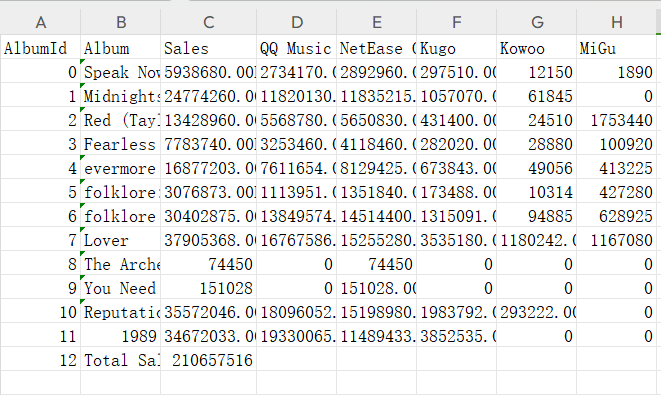
* The dataframe as csv of the songs in albums is(Because there are too many same style csv, this is one of them as an example):
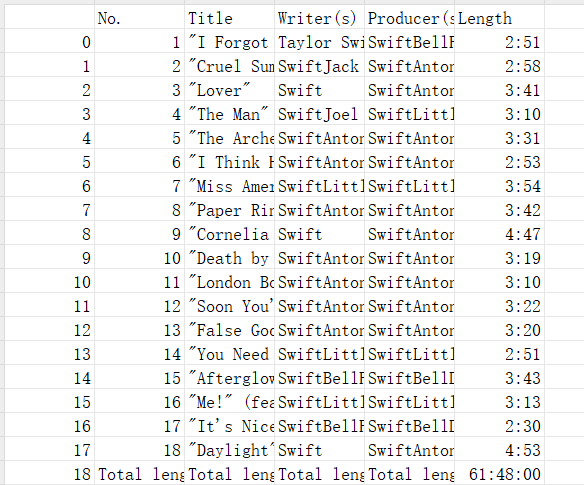
* The dataframe as csv of the Douban score of different albums:
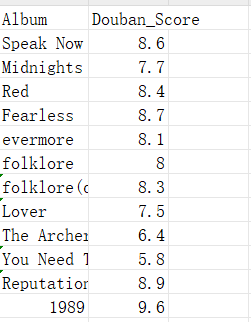

This is a code example of creating one of the tables, and the process of creating other tables is similar to it：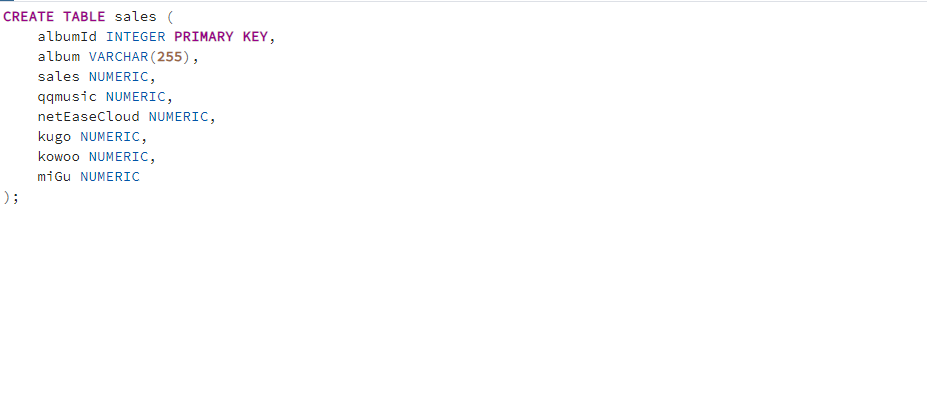

### This is the code we use to transfer data from CSV files to the database by using Python:
 * Build a new database named Taylor_Swift in pgAdmin4.
 * Try to connect the PostgreSQL database firstly, and then create a cursor object
 * Make the content of CSV files connect to the database which we have created.
 * Every time when the content is transfered successfully, get a feedback "The XXX CSV file has been successfully imported into the database table！"
 * After transfered all the content, close the cursor and connection.

In [ ]:
import psycopg2

# Connect to PostgreSQL database
try:
    conn = psycopg2.connect(
        dbname="Taylor_Swift",
        user="postgres",
        password="763730",
        host="localhost",
        port="5432"
    )
    print("Connection successful！")

    # Create a cursor object
    cursor = conn.cursor()

    # Execute the COPY command to import CSV files into database tables
    with open('C:/Users/Ela/Desktop/Taylor_Swift.csv', 'r') as f:
        next(f)  # Skip header line of CSV file
        cursor.copy_from(f, 'sales', sep=',')

    # Commit transaction
    conn.commit()
    print("The first CSV file has been successfully imported into the database table！")
    
    # The process of data transmission is the same as in the first part
    cursor = conn.cursor()

    with open('C:/Users/Ela/Desktop/Folklore.csv', 'r') as f:
        next(f)  
        cursor.copy_from(f, 'folklore', sep=',')

    conn.commit()
    print("The second CSV file has been successfully imported into the database table！")
    
    cursor = conn.cursor()

    with open('C:/Users/Ela/Desktop/Lover.csv', 'r') as f:
        next(f)  
        cursor.copy_from(f, 'lover', sep=',')

    conn.commit()
    print("The third CSV file has been successfully imported into the database table！")
    
    cursor = conn.cursor()

    
    with open('C:/Users/Ela/Desktop/Midnights.csv', 'r') as f:
        next(f)  
        cursor.copy_from(f, 'midnights', sep=',')

    conn.commit()
    print("The fourth CSV file has been successfully imported into the database table！")
    
    cursor = conn.cursor()

    
    with open('C:/Users/Ela/Desktop/Speak_Now.csv', 'r') as f:
        next(f)  
        cursor.copy_from(f, 'speak_now', sep=',')

    
    conn.commit()
    print("The fifth CSV file has been successfully imported into the database table！")
    
    cursor = conn.cursor()

    
    with open('C:/Users/Ela/Desktop/1989.csv', 'r') as f:
        next(f)  
        cursor.copy_from(f, 'a1989', sep=',')

    
    conn.commit()
    print("The sixth CSV file has been successfully imported into the database table！")
    
    cursor = conn.cursor()

    
    with open('C:/Users/Ela/Desktop/Evermore.csv', 'r') as f:
        next(f)  
        cursor.copy_from(f, 'evermore', sep=',')

    
    conn.commit()
    print("The seventh CSV file has been successfully imported into the database table！")
    
    cursor = conn.cursor()

    
    with open('C:/Users/Ela/Desktop/Red.csv', 'r') as f:
        next(f) 
        cursor.copy_from(f, 'red', sep=',')

    
    conn.commit()
    print("The eighth CSV file has been successfully imported into the database table！")
    
    cursor = conn.cursor()

    
    with open('C:/Users/Ela/Desktop/Reputation.csv', 'r') as f:
        next(f) 
        cursor.copy_from(f, 'reputation', sep=',')

    
    conn.commit()
    print("The ninth CSV file has been successfully imported into the database table！")
    
    cursor = conn.cursor()

    
    with open('C:/Users/Ela/Desktop/Fearless.csv', 'r') as f:
        next(f)  
        cursor.copy_from(f, 'fearless', sep=',')

    
    conn.commit()
    print("The tenth CSV file has been successfully imported into the database table！")
    
    cursor = conn.cursor()

    
    with open('C:/Users/Ela/Desktop/Douban_Score.csv', 'r') as f:
        next(f) 
        cursor.copy_from(f, 'douban', sep=',')

    
    conn.commit()
    print("The eleventh CSV file has been successfully imported into the database table！")

except psycopg2.Error as e:
    print("connect failed:", e)

finally:
    # Close cursor and connection
    cursor.close()
    conn.close()

### The result of Database( Show by ER picture and feedback sentence):
 #### ER picture:
 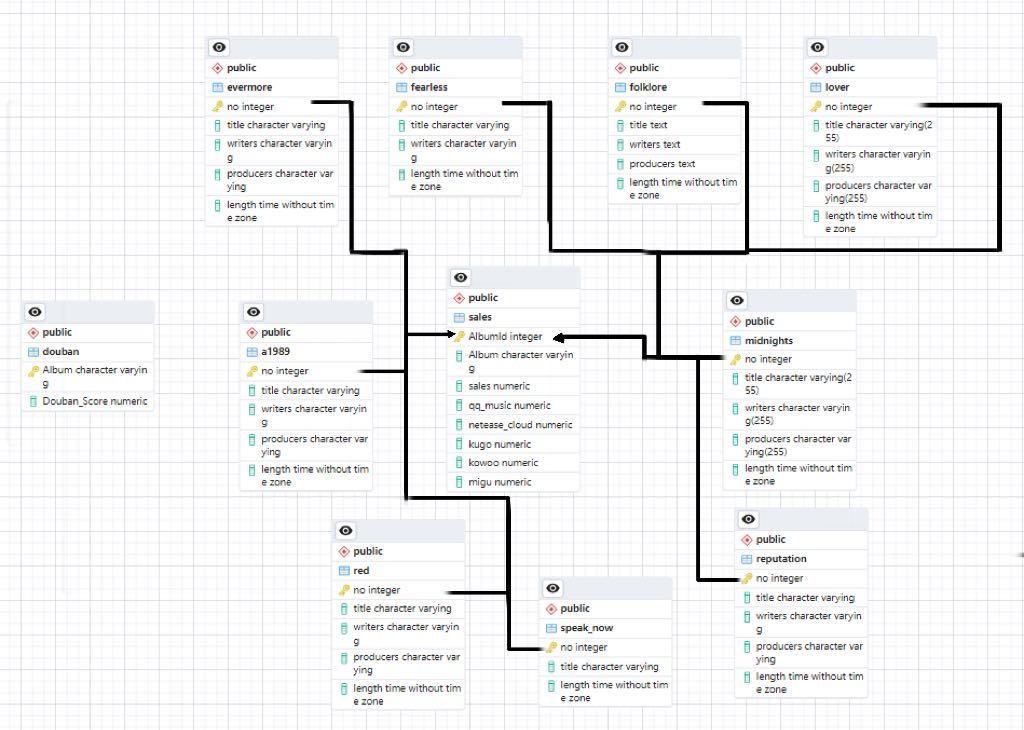

#### The feedback sentence:
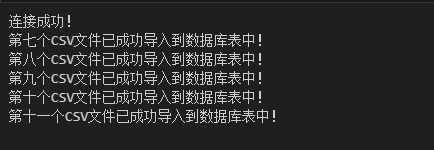
###### Notice: These Chinese sentence in picture means "Connect successfully!" and "The XXX CSV file has been successfully imported into the database table!" in English.

### Now, we read the content of database by connecting the database to jupyter notebook by python.
 * It is pretty similar to the way which we use to transfer content in CSV to the database.
### Then as the connection was built, we start to answer the question of our topic.
 * Firstly, make sure the data we need is in workplace and tuurned to dataframe
 * Secondly, we use sum function in pandas to compute the sum of sales of different sales platform
 * Thirdly, using plot finction make the result can be seen directly.
 * Then, compute the percentage of the sales in different platform among total sales, and use the total number of tickets to multiply,finally apply(math.ceil) to make sure the number of tickets is a integer.
 * Lastly, check if the total number of tickets is 100000, if over it, make the number of tickets in the worst selling sales platform minus this part.

### For the number of  songs which will be song in concert from different albums
* Use the same way but in the end of the computing, use the weight of douban score and weight of sales of album to make a calculation.

In [ ]:
import numpy as np
import pandas as pd
import math
import psycopg2

#Connect to database
try:
    conn = psycopg2.connect(
        dbname="Taylor_Swift",
        user="postgres",
        password="763730",
        host="localhost",
        port="5432"
    )
    print("Connection successful！")
    
    # Read the data of the sales table
    query = 'SELECT * FROM sales;'
    df = pd.read_sql_query(query, conn)
    
    # Extract album sales data
    data = {
        'AlbumId': df['AlbumId'].tolist(),
        'Album': df['Album'].tolist(),
        'sales': df['sales'].tolist(),
        'qq_music': df['qq_music'].tolist(),
        'netease_cloud': df['netease_cloud'].tolist(),
        'kugo': df['kugo'].tolist(),
        'kowoo': df['kowoo'].tolist(),
        'migu': df['migu'].tolist()
    }
        
    # Create a DataFrame for sales data
    df1 = pd.DataFrame(data, columns=['AlbumId', 'Album', 'sales', 'qq_music', 'netease_cloud', 'kugo', 'kowoo', 'migu'])
    
    # Calculate the total sales volume of each platform
    QQ_Music = df1['qq_music'].sum()
    NetEase_Cloud = df1['netease_cloud'].sum()
    Kugo = df1['kugo'].sum()
    Kowoo = df1['kowoo'].sum()
    Migu = df1['migu'].sum()
    
    # Create DataFrame for sales on various platforms
    df3 = pd.DataFrame({
        'Name': ['qq_music', 'netEase_cloud', 'kugo', 'kowoo', 'migu'],
        'sales': [QQ_Music, NetEase_Cloud, Kugo, Kowoo, Migu]
    }).sort_values(['Name'], ignore_index=True)
    
    # Draw a Sales by Platform diagram
    PlotA = df3.plot.bar(x='Name', y='sales', title='Sales by Platform')
    
    # tally the vote
    Per_ByPlantName = df3.copy()
    Ticket = (100000 * (Per_ByPlantName['sales'] / Per_ByPlantName['sales'].sum())).apply(math.ceil)
    Ticket[Ticket.idxmax()] -= sum(Ticket) - 100000 if sum(Ticket) > 100000 else 0
    
    # Calculate total album sales
    sales = df1[['qq_music', 'netease_cloud', 'kugo', 'kowoo', 'migu']].sum(axis=1)
    
    # Delete useless data
    sales = sales.drop(6)
    Album_Name = df1['Album'].drop(6)
    
    # Create a DataFrame for album sales
    df2 = pd.DataFrame({'sales': sales, 'Album_Name': Album_Name}).sort_values(['Album_Name'], ignore_index=True)
    
    # Draw a bar chart of album sales
    PlotB = df2.plot.bar(x='Album_Name', y='sales', title='Sales by Album')
    
    # Calculate sales description statistics
    Des_Albumsum = df1[['qq_music', 'netease_cloud', 'kugo', 'kowoo', 'migu']].describe()
    
    # Retrieve Douban rating data from the database
    query_douban = 'SELECT * FROM douban;'
    df_douban = pd.read_sql_query(query_douban, conn)
    
    # Calculate the proportion of album sales
    df2['%'] = 100 * (df2['sales'] / df2.groupby('Album_Name')['sales'].transform('sum'))
    
    # Calculate album sales weighted score
    Per_ByAlbumName = df2.copy()
    df4 = df2.merge(df_douban, how='left', left_on='Album_Name', right_on='Album')
    df4['%'] = 100 * (df4['Douban_Score'] / df4.groupby('Album_Name')['Douban_Score'].transform('sum'))
    df4['Weight'] = 0.6 * df4['%'] + 0.4 * df4['%']
    
    # Calculate final weight
    df5 = df4.groupby('Album_Name').agg({'Weight': 'sum'}).reset_index()
    df5['%'] = 100 * (df5['Weight'] / df5['Weight'].sum())
    
    # Adjusting the number of concert songs
    Album_count = [14, 13, 16, 13, 15, 16, 0, 18, 0, 0, 14, 13]
    total_songs = 35
    total_proportion = sum(Album_count)
    adjusted_songs = [math.ceil(song * total_songs / total_proportion) for song in Album_count]
    df7 = pd.concat([pd.Series(adjusted_songs), df1['Album']], axis=1).sort_values(['Album'], ignore_index=True)
    df7.columns = ['Songs_number_in_concert', 'Album_Name']
    
    # Create a DataFrame with votes and platform name
    df6 = pd.DataFrame({'Tickets': Ticket, 'Platform_Name': df3['Name']}).sort_values(['Platform_Name'], ignore_index=True)
    
    # Print results
    print(PlotA)
    print(PlotB)
    print(df6)
    print(df7)

finally:
    # Closed database connection
    if conn is not None:
        conn.close()

### Summary:
 * As we can see the best seller is qq_music platform, and the worst is kowoo platform.
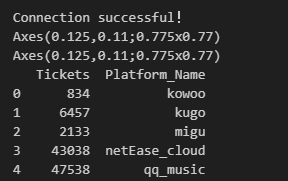
 * And, the number of tickets in different platform is 
 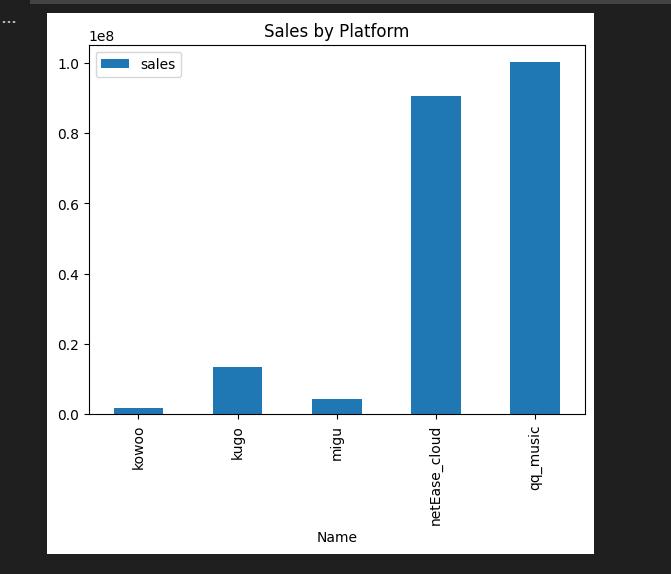
 * Also, the best sales of Album is Lover, the worst is The Archer.
 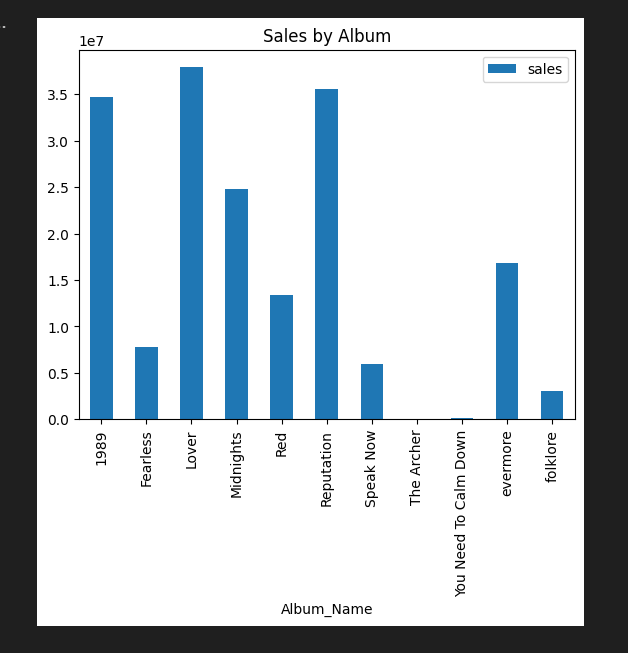
 * And, the number of songs in different albums is
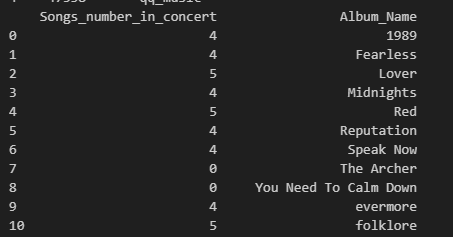